<a href="https://colab.research.google.com/github/muesgit/deep_learning_tutorial/blob/main/Simple_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [22]:
# Create a Modell Class that inherits nn.Module
class Model(nn.Module):
  # Input Layer (4 Features of the flower)
  # --> Hidden Layer 1 (number of neurons)
  # --> H2(n)
  # --> Output (3 Classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate the nn.Model
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x


In [23]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create instance of model
model = Model()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib inline

In [3]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [5]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
# Change labels to numbers
my_df['species'] = my_df['species'].replace({'setosa':0.0, 'versicolor':1.0, 'virginica':2.0})

<ipython-input-7-7010f8ab90c7>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace({'setosa':0.0, 'versicolor':1.0, 'virginica':2.0})


In [8]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [12]:
# Train Test Split! Set X, y
X = my_df.drop('species', axis=1)
y = my_df['species']

In [13]:
X = X.values
y = y.values

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Train Test Split

In [17]:
# test size 0.2 = 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [21]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# Long Tensor 64Bit Integers
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [24]:
# Set the criterion of model to measure the error,
# how far off the prediciton from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr= learning rate (if error doenst go down after a
# bunch of iterations (epochs), lower the rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [25]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [28]:
Model.parameters

<function torch.nn.modules.module.Module.parameters(self, recurse: bool = True) -> Iterator[torch.nn.parameter.Parameter]>

In [30]:
# Train our model!
# Epoch (one run thru all the training data in network)
epochs = 100
losses = []
for i in range(epochs):
  # go foward and get prediciton
  y_pred = model.forward(X_train)
  # Measure the loss/error
  loss = criterion(y_pred, y_train)
  # Keep track of losses
  losses.append(loss.detach().numpy())
  # print every 10 epoch
  if i % 10 == 0:
      print(f'Epoch: {i} and loss: {loss}')
  # Back Propagation: Take the error rate of forward propagationand
  # feed it back thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.0096259117126465
Epoch: 20 and loss: 0.8157405853271484
Epoch: 30 and loss: 0.585706353187561
Epoch: 40 and loss: 0.3999636471271515
Epoch: 50 and loss: 0.2676880657672882
Epoch: 60 and loss: 0.17942363023757935
Epoch: 70 and loss: 0.12151690572500229
Epoch: 80 and loss: 0.0860118418931961
Epoch: 90 and loss: 0.06520850956439972


Text(0.5, 0, 'Epoch')

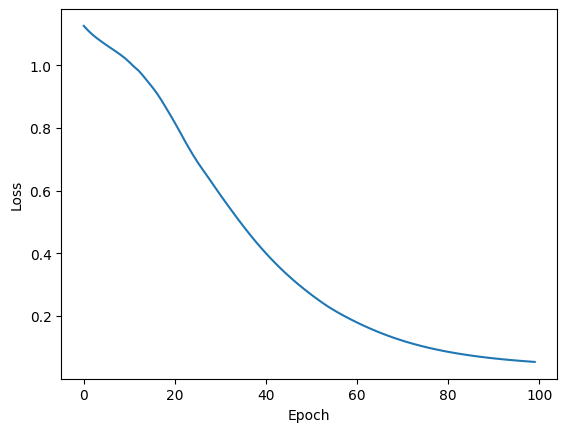

In [32]:
# Graph
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')